### Zomato Restaurant Data Analysis And EDA + visualization project

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
zomato_df = pd.read_csv('zomato.csv')
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Data Exploration

In [10]:
zomato_df.shape

(51717, 17)

In [11]:
zomato_df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [12]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [13]:
zomato_df.isnull().sum()


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### Data Cleaning

In [14]:
zomato_df.drop(['url', 'address', 'phone' , 'reviews_list', 'menu_item'], axis=1, inplace=True)


In [15]:
zomato_df.dropna(subset=['rate', 'location', 'cuisines'], inplace=True)

In [16]:
zomato_df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        151
dish_liked                     20322
cuisines                           0
approx_cost(for two people)      249
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [17]:
zomato_df.dropna(how='any', inplace=True)

In [18]:
zomato_df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [19]:
zomato_df.rename(columns={'approx_cost(for two people)': 'cost', 
                          'listed_in(type)': 'type', 
                          'listed_in(city)' : 'city' }, inplace=True)

In [20]:
zomato_df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'type', 'city'],
      dtype='object')

In [21]:
zomato_df['rate'].sample(10)

50513    3.9 /5
50926    4.5 /5
40367    3.7 /5
8240      3.0/5
31079    4.3 /5
29585    3.4 /5
26296    4.0 /5
3233      4.2/5
42156    2.6 /5
16407     3.8/5
Name: rate, dtype: object

In [22]:
zomato_df['rate'] = zomato_df['rate'].replace({'NEW': np.nan, '-': np.nan})

zomato_df.dropna(how='any', inplace=True)

In [23]:
zomato_df.shape

(23259, 12)

In [24]:
zomato_df['cost'].sample(10)

47302      650
37683    3,400
34125      400
2083       400
778        550
39596      650
8657       350
26999      300
6243     3,000
18910      400
Name: cost, dtype: object

In [25]:
zomato_df['rate'] = zomato_df['rate'].apply(lambda x: str(x).split('/')[0])
zomato_df['rate'] = zomato_df['rate'].astype(float)

zomato_df['cost'] = zomato_df['cost'].apply(lambda x: str(x).replace(',', ''))
zomato_df['cost'] = zomato_df['cost'].astype(int)

In [26]:
zomato_df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari


In [27]:
zomato_df['cost'].sample(10)

4387      750
26191     600
22198     600
40690     300
42515     750
49415     450
26708     750
23591    1000
9740      500
35205     500
Name: cost, dtype: int64

In [28]:
zomato_df.drop_duplicates(inplace=True)

### Exploratory Data Analysis  (EDA)

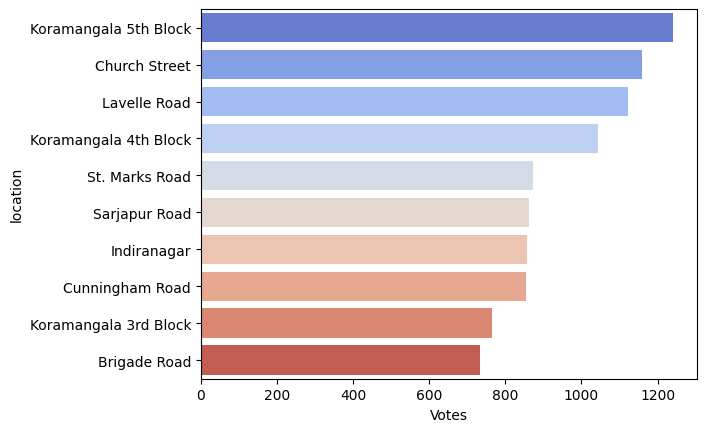

In [210]:
# The average of the top most popular location with highest number of votes
most_popular_loc = zomato_df.groupby('location')['votes'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=most_popular_loc.values, y = most_popular_loc.index, palette='coolwarm')
plt.xlabel('Votes')
plt.show()

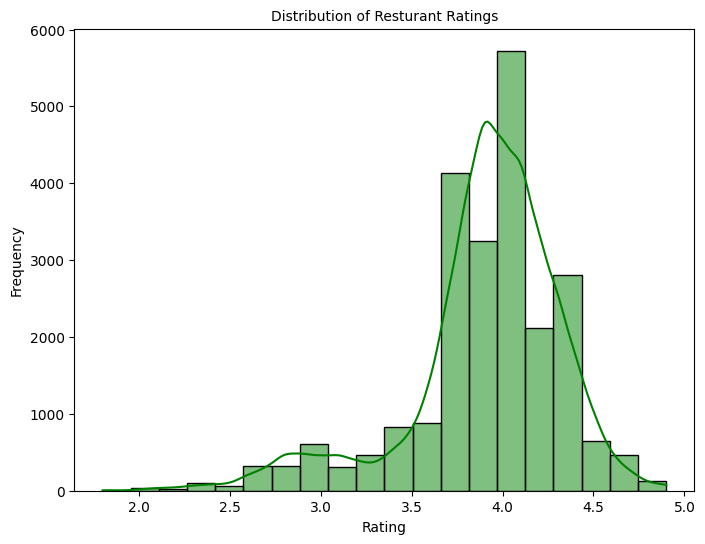

In [29]:
# Now Here a histogram plot has been created based on the rating. 
plt.figure(figsize=(8,6))
sns.histplot(zomato_df['rate'], bins=20, kde=True, color='g')
plt.title('Distribution of Resturant Ratings' , fontsize=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

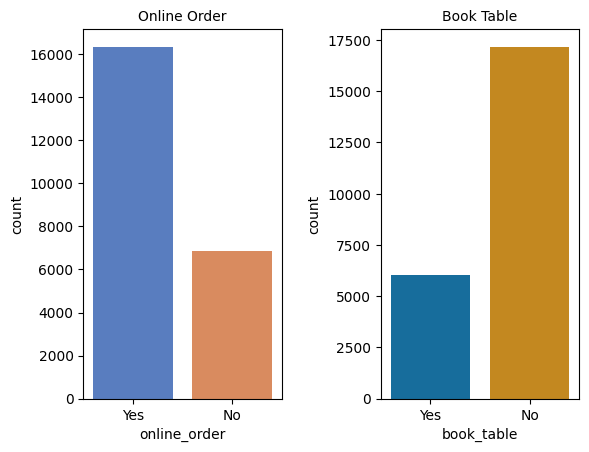

In [141]:
# I've have create a graph using subplot to show how many people have placed online order 
# and how many have booked tables.
count_online_order = zomato_df['online_order'].value_counts()
count_book_table = zomato_df['book_table'].value_counts().sort_values(ascending=True)

plt.subplot(1,2,1)
sns.barplot(count_online_order, palette='muted' )
plt.title('Online Order', fontsize=10)
plt.subplot(1,2,2)
sns.barplot(count_book_table, palette='colorblind')
plt.title('Book Table', fontsize=10)
plt.subplots_adjust(wspace=0.5)
plt.show()

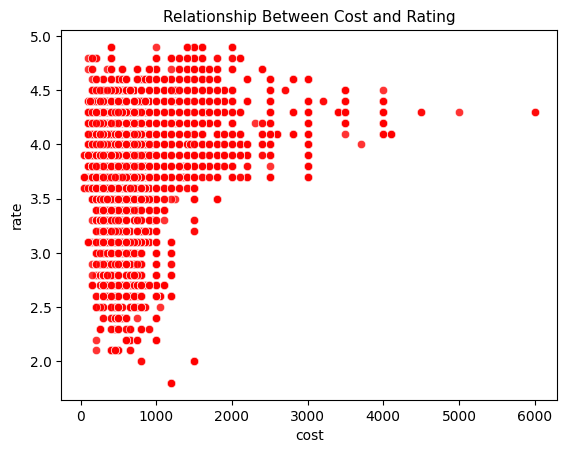

In [200]:
# using a scatter plot, I checked how much the cost was rated.
sns.scatterplot(x='cost', y= 'rate',data=zomato_df,alpha=0.8,color='red')
plt.title('Relationship Between Cost and Rating', fontsize=11)
plt.show()